# W5_Exploring Ensemble Methods

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('lending-club-data.csv')
data.columns

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans', 'bad_loans',
       'emp_length_num', 'grade_num', 'sub_gra

In [3]:
data['safe_loans'] = data['bad_loans'].apply(lambda x: 1 if x==0 else -1)
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]
target = 'safe_loans'
data = pd.get_dummies(data[[target]+features].dropna(axis=0, how='any'))
data.head()

,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
0,1,0.4,0,11,27.65,8.14350,0.0,1.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
1,-1,0.8,1,1,1.00,2.39320,0.0,1.0,5.0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1.0,0,11,8.72,8.25955,0.0,1.0,2.0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,0.2,0,11,20.00,8.27585,0.0,1.0,1.0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0.8,0,4,11.20,5.21533,0.0,1.0,3.0,1,...,0,0,0,0,0,0,0,0,0,1


In [4]:
train_index = list(pd.read_json('module-8-assignment-1-train-idx.json')[0])
val_index = list(pd.read_json('module-8-assignment-1-validation-idx.json')[0])
train = data.iloc[train_index]
validataion = data.iloc[val_index]

In [5]:
def get_numpy_data(dataframe, features, output):
    features_matrix = dataframe[features].values
    label_array = dataframe[output].values 
    return (features_matrix, label_array)

In [6]:
features = list(train.columns)
features.remove('safe_loans')
train_X, train_y = get_numpy_data(train, features, target)
val_X, val_y = get_numpy_data(validataion, features, target)
model_5 = GradientBoostingClassifier(n_estimators=5, max_depth=6).fit(train_X, train_y)

In [7]:
# make predictions
safe_loans = validataion[validataion['safe_loans']==1].iloc[0:2]
risky_loans = validataion[validataion['safe_loans']==-1].iloc[0:2]
sample = safe_loans.append(risky_loans)
sample

,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
22,1,0.2,0,3,29.44,6.30496,0.0,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
26,1,0.6,1,1,12.19,13.49520,0.0,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
24,-1,0.4,0,3,13.97,2.96736,3.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
41,-1,1.0,0,11,16.33,1.90524,0.0,1.0,0.0,1,...,1,0,0,0,0,0,0,0,0,0


In [8]:
sample_X = sample.drop('safe_loans', axis=1).values
sample_y = sample['safe_loans']
model_5.predict(sample_X)

array([ 1,  1, -1,  1], dtype=int64)

In [9]:
# prediction probabilities
model_5.predict_proba(sample_X)

array([[ 0.41642331,  0.58357669],
       [ 0.46949689,  0.53050311],
       [ 0.53807792,  0.46192208],
       [ 0.39591639,  0.60408361]])

In [10]:
# evaluate the model on the validation data
model_5.score(val_X, val_y)

0.66135286514433433

In [11]:
predictions = model_5.predict(val_X)
df = pd.DataFrame({'predicted label':predictions, 'actual label':val_y})
df.head()

,actual label,predicted label
0,-1,-1
1,-1,1
2,-1,-1
3,-1,-1
4,-1,1


In [12]:
# count false positive
false_pos = df[(df['predicted label']==1) & (df['actual label']==-1)].shape[0]
false_pos

1653

In [13]:
# count false negative
false_neg = df[(df['predicted label']==-1) & (df['actual label']==1)].shape[0]
false_neg

1491

In [14]:
10000*false_neg + 20000*false_pos

47970000

In [15]:
# most positive & negative loans
prob_predictions = model_5.predict_proba(val_X)
validataion['predicted_prob'] = prob_predictions[:,1]
sorted_val = validataion.sort_values(by='predicted_prob', ascending=False)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
sorted_val.iloc[0:5][['grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E']]

,grade_A,grade_B,grade_C,grade_D,grade_E
8021,1,0,0,0,0
34261,1,0,0,0,0
68947,1,0,0,0,0
99626,1,0,0,0,0
69995,1,0,0,0,0


In [17]:
# effects of adding more trees
model_10 = GradientBoostingClassifier(n_estimators=10, max_depth=6).fit(train_X, train_y)
model_50 = GradientBoostingClassifier(n_estimators=50, max_depth=6).fit(train_X, train_y)
model_100 = GradientBoostingClassifier(n_estimators=100, max_depth=6).fit(train_X, train_y)
model_200 = GradientBoostingClassifier(n_estimators=200, max_depth=6).fit(train_X, train_y)
model_500 = GradientBoostingClassifier(n_estimators=500, max_depth=6).fit(train_X, train_y)

In [18]:
training_errors = []
val_errors = []
for model in [model_10, model_50, model_100, model_200, model_500]:
    training_errors.append(1 - model.score(train_X, train_y))
    val_errors.append(1 - model.score(val_X, val_y))
val_errors

[0.33369237397673412,
 0.31548901335631196,
 0.30945713054717794,
 0.31419646704006898,
 0.31010340370529943]

In [19]:
# plot the training and validation error vs. number of trees
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':12})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

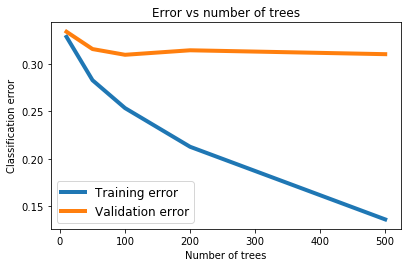

In [20]:
plt.plot([10, 50, 100, 200, 500], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100, 200, 500], val_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')